In [1]:
#Flight Delay Prediction
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [2]:
flights = pd.read_csv('flights.csv')
flights

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1740355,2015,4,21,2,EV,6049,N10575,EWR,IAD,...,2117.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1500827,2015,4,7,2,AS,81,N706AS,SEA,ANC,...,829.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3282889,2015,7,24,5,EV,5236,N936EV,MOB,ATL,...,1539.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,652599,2015,2,13,5,UA,668,N440UA,ORD,LGA,...,915.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3988136,2015,9,5,6,AS,615,N517AS,LAS,SEA,...,908.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872857,4985463,2015,11,8,7,B6,1347,N524JB,DCA,SJU,...,1352.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
872858,138753,2015,1,9,5,MQ,3060,N682MQ,LSE,ORD,...,2124.0,125.0,0,0,NaN,86.0,0.0,0.0,39.0,0.0
872859,2801672,2015,6,25,4,US,856,N114UW,PBI,CLT,...,1904.0,15.0,0,0,NaN,13.0,0.0,0.0,2.0,0.0
872860,4806956,2015,10,27,2,AA,1129,N488AA,12339,11298,...,1728.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights_needed_data = flights[0:100000] 

In [4]:
flights_needed_data

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1740355,2015,4,21,2,EV,6049,N10575,EWR,IAD,...,2117.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1500827,2015,4,7,2,AS,81,N706AS,SEA,ANC,...,829.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3282889,2015,7,24,5,EV,5236,N936EV,MOB,ATL,...,1539.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,652599,2015,2,13,5,UA,668,N440UA,ORD,LGA,...,915.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3988136,2015,9,5,6,AS,615,N517AS,LAS,SEA,...,908.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3205012,2015,7,20,1,AA,1657,N3DWAA,LAS,DFW,...,559.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,1915284,2015,5,2,6,AS,64,N615AS,WRG,KTN,...,1659.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,3684716,2015,8,17,1,EV,5356,N195PQ,PHF,ATL,...,1345.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2031508,2015,5,9,6,AA,2378,N403AA,DFW,ORD,...,2345.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           100000 non-null  int64  
 1   YEAR                 100000 non-null  int64  
 2   MONTH                100000 non-null  int64  
 3   DAY                  100000 non-null  int64  
 4   DAY_OF_WEEK          100000 non-null  int64  
 5   AIRLINE              100000 non-null  object 
 6   FLIGHT_NUMBER        100000 non-null  int64  
 7   TAIL_NUMBER          99741 non-null   object 
 8   ORIGIN_AIRPORT       100000 non-null  object 
 9   DESTINATION_AIRPORT  100000 non-null  object 
 10  SCHEDULED_DEPARTURE  100000 non-null  int64  
 11  DEPARTURE_TIME       98496 non-null   float64
 12  DEPARTURE_DELAY      98496 non-null   float64
 13  TAXI_OUT             98447 non-null   float64
 14  WHEELS_OFF           98447 non-null   float64
 15  SCHEDULED_TIME    

In [6]:
flights_needed_data.value_counts('DIVERTED')

DIVERTED
0    99751
1      249
dtype: int64

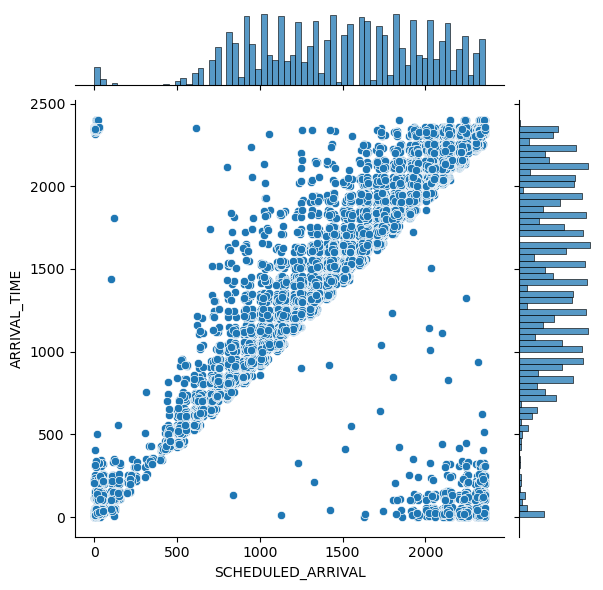

In [7]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [8]:
corr = flights_needed_data.corr(method='pearson')

C:\Users\gandh\AppData\Local\Temp\ipykernel_7540\1887864288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_needed_data.corr(method='pearson')


<Axes: >

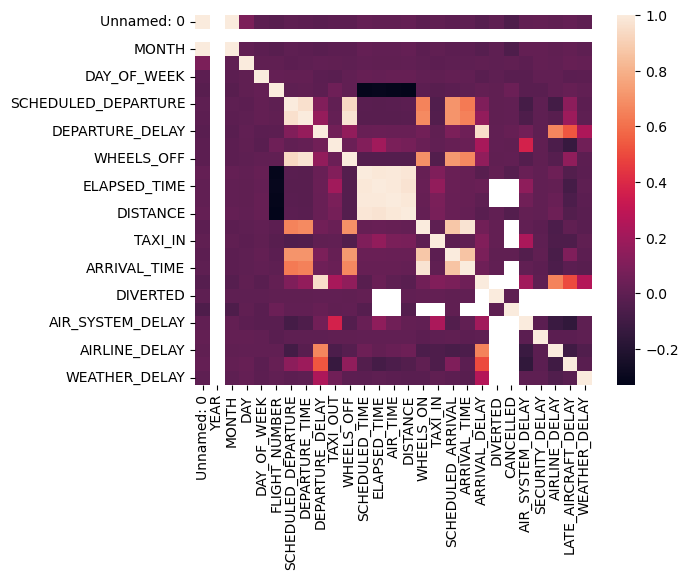

In [9]:
sb.heatmap(corr)

In [10]:
corr

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
Unnamed: 0,1.000000,NaN,0.996430,0.090034,-0.009916,-0.022504,-0.002705,-0.006887,-0.017547,-0.007130,...,-0.007224,-0.005694,-0.031497,-0.004087,-0.056070,0.008182,0.013171,0.001405,0.014418,-0.003976
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,0.996430,NaN,1.000000,0.006853,-0.010166,-0.022861,-0.004858,-0.008995,-0.017980,-0.007707,...,-0.008814,-0.007037,-0.031746,-0.003743,-0.056233,0.009405,0.012627,0.001045,0.012737,-0.005319
DAY,0.090034,NaN,0.006853,1.000000,-0.000146,0.003409,-0.006573,-0.006169,0.004276,0.003487,...,-0.005738,-0.006374,0.001533,-0.003190,-0.001081,-0.009713,0.009740,0.006966,0.022647,0.017302
DAY_OF_WEEK,-0.009916,NaN,-0.010166,-0.000146,1.000000,0.014434,0.012261,0.009531,-0.013174,-0.019284,...,0.009920,0.006190,-0.018783,-0.004816,-0.021570,-0.021448,0.005730,0.004906,-0.015120,-0.009863
FLIGHT_NUMBER,-0.022504,NaN,-0.022861,0.003409,0.014434,1.000000,-0.004181,0.000407,-0.009606,0.046094,...,-0.014277,-0.003289,0.014094,0.002678,0.037392,-0.019120,-0.018687,0.006855,0.022839,0.005045
SCHEDULED_DEPARTURE,-0.002705,NaN,-0.004858,-0.006573,0.012261,-0.004181,1.000000,0.962564,0.106544,0.007151,...,0.706982,0.628415,0.097974,-0.001327,0.005434,-0.086755,-0.003858,-0.091579,0.141134,-0.010183
DEPARTURE_TIME,-0.006887,NaN,-0.008995,-0.006169,0.009531,0.000407,0.962564,1.000000,0.169689,0.014333,...,0.707983,0.647900,0.159110,-0.000543,0.007537,-0.056638,-0.002017,-0.023363,0.185555,-0.002731
DEPARTURE_DELAY,-0.017547,NaN,-0.017980,0.004276,-0.013174,-0.009606,0.106544,0.169689,1.000000,0.058867,...,0.090093,0.046502,0.948176,0.008429,0.022600,0.059429,-0.004415,0.662896,0.528411,0.241393
TAXI_OUT,-0.007130,NaN,-0.007707,0.003487,-0.019284,0.046094,0.007151,0.014333,0.058867,1.000000,...,0.023907,0.032307,0.221965,0.004546,0.000074,0.370844,-0.001274,-0.060440,-0.132008,0.052276


In [11]:
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [12]:
flights_needed_data

,Unnamed: 0,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1740355,4,21,EWR,IAD,1943,-4.0,2112,2117.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1500827,4,7,SEA,ANC,600,-3.0,838,829.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,3282889,7,24,MOB,ATL,1322,7.0,1537,1539.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
3,652599,2,13,ORD,LGA,600,-2.0,907,915.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
4,3988136,9,5,LAS,SEA,650,-4.0,920,908.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3205012,7,20,LAS,DFW,59,28.0,547,559.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN
99996,1915284,5,2,WRG,KTN,1633,-3.0,1705,1659.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN
99997,3684716,8,17,PHF,ATL,1200,2.0,1342,1345.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN
99998,2031508,5,9,DFW,ORD,2140,-1.0,6,2345.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [13]:
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

C:\Users\gandh\AppData\Local\Temp\ipykernel_7540\3214016927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())


In [14]:
flights_needed_data

,Unnamed: 0,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1740355,4,21,EWR,IAD,1943,-4.0,2112,2117.0,5.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
1,1500827,4,7,SEA,ANC,600,-3.0,838,829.0,-9.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
2,3282889,7,24,MOB,ATL,1322,7.0,1537,1539.0,2.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
3,652599,2,13,ORD,LGA,600,-2.0,907,915.0,8.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
4,3988136,9,5,LAS,SEA,650,-4.0,920,908.0,-12.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3205012,7,20,LAS,DFW,59,28.0,547,559.0,12.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
99996,1915284,5,2,WRG,KTN,1633,-3.0,1705,1659.0,-6.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
99997,3684716,8,17,PHF,ATL,1200,2.0,1342,1345.0,3.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216
99998,2031508,5,9,DFW,ORD,2140,-1.0,6,2345.0,-21.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216


In [15]:
result=[]

In [16]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [17]:
flights_needed_data['result'] = result

In [18]:
flights_needed_data

,Unnamed: 0,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1740355,4,21,EWR,IAD,1943,-4.0,2112,2117.0,5.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
1,1500827,4,7,SEA,ANC,600,-3.0,838,829.0,-9.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
2,3282889,7,24,MOB,ATL,1322,7.0,1537,1539.0,2.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
3,652599,2,13,ORD,LGA,600,-2.0,907,915.0,8.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
4,3988136,9,5,LAS,SEA,650,-4.0,920,908.0,-12.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3205012,7,20,LAS,DFW,59,28.0,547,559.0,12.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
99996,1915284,5,2,WRG,KTN,1633,-3.0,1705,1659.0,-6.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
99997,3684716,8,17,PHF,ATL,1200,2.0,1342,1345.0,3.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
99998,2031508,5,9,DFW,ORD,2140,-1.0,6,2345.0,-21.0,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0


In [19]:
flights_needed_data.value_counts('result')

result
0    82445
1    17555
dtype: int64

In [20]:
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,Unnamed: 0,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1740355,4,21,1943,-4.0,2112,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
1,1500827,4,7,600,-3.0,838,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
2,3282889,7,24,1322,7.0,1537,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
3,652599,2,13,600,-2.0,907,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
4,3988136,9,5,650,-4.0,920,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3205012,7,20,59,28.0,547,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
99996,1915284,5,2,1633,-3.0,1705,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
99997,3684716,8,17,1200,2.0,1342,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0
99998,2031508,5,9,2140,-1.0,6,0,0,13.298207,0.052251,19.911508,23.67723,2.812216,0


In [21]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [22]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [24]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9970097326160203